# Amphi 7 - Classification [1] - Basic Models for Binary Classification

# 1. The Statistical Learning Framework for Supervised Learning

In last amphi, we access the first supervised learning problem (regression) in an informal way. In this section, we want to use probability and statistical language to describe the previously introduced notions on supervised learning.

## 1.1 The Statistical Learning Framework

Suppose that we have a framework with the following elements:

1. An arbitrary set $\mathcal X$, typically $\mathbf R^D$, called the **domain set**. The elements of $\mathcal X$ are called **vectors** or **instances**, their coordinates (components) are called **features**.

2. An arbitrary set $\mathcal Y$, typically an interval of $\mathbf R$ or sum finite subset of $\mathbf N$. $\mathcal Y$ is called the **label set** or **target set**; its elements are **labels** or **targets**.

3. A finite sequence $S = \{(x_1, y_1), \ldots (x_N, y_N)\} \in (\mathcal X \times \mathcal Y)^D$. This set is called the **training set**, its points are called **training data**.

4. A distance function $l: \mathcal Y \times \mathcal Y \to \mathbf R$ or $l: \mathcal Y' \times \mathcal Y' \to \mathbf R$ where $\mathcal Y \subset \mathcal Y'$. 

5. A class $\mathcal H$ of functions $h : \mathcal X \to \mathcal Y$ or a set including $\mathcal Y$. $\mathcal H$ is called the hypothesis class, its elements are called **predictive model** or **hypothesis**.

We suppose in addition the following condition:
<ol start="6">
<li> There exists a probability distribution $\mathcal D$ of generating data sample $(x, y) \in (\mathcal X \times \mathcal Y)$.</li>
</ol>
Theoretically we would like to find a function $f \in \mathcal H$ minimizing the following **true error** (or **generalized error**, or **true risk**)

$$
\mathcal L_{\mathcal D}(f) = \mathbf E_{\mathcal D} [l(f(x), y)] = \int_{\mathcal X \times \mathcal Y} l(f(x), y) p(x, y) dxdy
$$

## 1.2 Empirical Risk Minimization

In reality, we have not much knowledge about $\mathcal D$ (indeed if we know $\mathcal D$, it is easy to choose the best $f(x) = \mathbf E[y|x]$). So, impossible to establish the function $L_{\mathcal D}$. One approach is to approximate $\mathcal L_{\mathcal D}(f)$ by $\mathcal L_S (f)$:

$$
\mathcal L_S(f) = \frac1N \sum_{(x_i, y_i) \in S}l(f(x_i), y_i)
$$

and minimize $\mathcal L_S$ instead of $\mathcal L_{\mathcal D}$. The problem of finding $f \in \mathcal H$ minimizing $\mathcal L_S$ is called **Empirical Risk Minimization** (ERM).

## 1.3 Examples:

### 1.3.1 Linear Regression

In regression problems, $\mathcal Y = \mathbf R$ or an interval of $\mathbf R$.

If we choose, $l(y, y')$ is $l(y, y') = |y - y'|^2$.

An example of $\mathcal H$ is $\mathcal H = \{ x \mapsto w \cdot x + b; w, b \in \mathbf R \}$. This leads to linear regression model (previous amphi).

### 1.3.2 Binary classification

In binary classification, $\mathcal Y = \{0, 1\}$. We can choose $l(y, y') = \mathbf 1_{y' \neq y}$. However, this is not a convenient choice for computation ($\mathbf 1_{y' \neq y}$ is not differentiable). This function can be converted to a smoother one. For example, use $l(y, y') = - y\log y' - (1-y)\log(1-y')$ and  $\mathcal H = \{ x \mapsto \frac 1 {1 + \exp(-w \cdot x - b)}; w, b \in \mathbf R \}$, we have logistic regression model.


# 2. Some Probabilistic and Non-probabilistic Strategies for Classification Problems

The goal of clasification is to take an input vector $\mathbf x \in \mathcal X$ and find a function $f: \mathcal X \to \mathcal Y = \{0, 1, \ldots, K-1\}$ to assign any $\mathbf x$ to a class. The classes are supposed to be disjoint, i.e, each element of $\mathcal X$ belongs to only one class.

We begin with binary classification problems where $\mathcal Y = \{0, 1\}$. The problems become to divide $\mathcal X$ into 2 domains, one is labeled 0, the other labeled 1. An equivalent way is to determine the boundary of the two zones corresponding to those classes.

We can introduce some groups of learning algorithms to solve classification problem:

- Construct a **discriminant function** to directly assign each $\mathbf x \in \mathcal X$ to $\{0, 1\}$.

- Modelize the **conditional probability distribution** $p(y = 0|\mathbf x)$, $p(y = 1| \mathbf x)$, then make decision based on those values.

- Modelize the **joint probability distribution** $p(y=0,\mathbf x)$, $p(y=1|\mathbf x)$, then deduce  $p(y = 0|\mathbf x)$, $p(y = 1| \mathbf x)$ and make decision.

In this lecture we study algorithms representing those 3 groups. 

**Linear Models**

Linear models for binary classification are hypothesis classes that predict the boundary as a $D-1$ dimensional hyperplan of $\mathcal X = \mathbf R^D$. The hyperplan's is $\mathbf w \cdot \mathbf x + b = 0$. 

# 3. Fisher's Linear Discriminant (Linear Discriminant Analysis)

## 3.1 Intuition

One idea of classification using linear model is to define a direction in which the projections of data can be separated in 2 half-lines.

Let $\mathbf m_0, \mathbf m_1$ be the centroids of 2 classes:

$$
\mathbf m_0 = \frac1{N_0}\sum_{\mathbf x \in \mathcal C_0} \mathbf x
$$

$$
\mathbf m_1 = \frac1{N_1}\sum_{\mathbf x \in \mathcal C_1} \mathbf x
$$

The first intuition is to find a unit vector $\mathbf w$ such that $|m_0 - m_1| = | \mathbf w \cdot (\mathbf m_0 - \mathbf m_1) |$ is largest, i.e, the distance of projections of these 2 centroids is largest.

This leads to $\mathbf w \sim \mathbf m_0 - \mathbf m_1$ (the $\sim$ notation means "same direction").

<img src="F1.png">
<center>Figure 1: Illustration: left - solution of the maximization of $|m_1 - m_0|$ problem; right: a better solution.</center>

This choice is not appropriate, as it does not take into account the distance of points inside each class.

## 3.2 The optimization problem

We would need another solution, not only maximize the projection distance between different classes, but also minimize projection distance inside a class.

We introduce

$$
J(\mathbf w) = \frac{(m_0 - m_1)^2}{s_0^2 + s_1^2}
$$

where $(m_0-m_1)^2$ represents projected distance of 2 classes, and
$$
s_0 = \sum_{\mathcal C_0} (\mathbf w \cdot \mathbf x - \mathbf w \cdot \mathbf m_0)^2 
$$

$$
s_1 = \sum_{\mathcal C_1} (\mathbf w \cdot \mathbf x - \mathbf w \cdot \mathbf m_1)^2 
$$

$J(\mathbf w)$ can be rewritten as
$$
J(\mathbf w) = \frac{\mathbf w^t \mathbf S_B \mathbf w}{\mathbf w^t \mathbf S_W \mathbf w}
$$

where

$$
\mathbf S_B = (\mathbf m_0 - \mathbf m_1)(\mathbf m_0 - \mathbf m_1)^t
$$

and

$$
\mathbf S_W = \sum_{\mathcal C_0} (\mathbf x - \mathbf m_0)(\mathbf x - \mathbf m_0)^t + \sum_{\mathcal C_1} (\mathbf x - \mathbf m_1)(\mathbf x - \mathbf m_1)^t
$$

We want to find the unit vector $\mathbf w$ that maximizes $J$.

## 3.3 The optimized direction


By derivation, the solution satisfies:
$$
(\mathbf w^t \mathbf S_B \mathbf w)\mathbf S_W  \mathbf w = (\mathbf w^t \mathbf S_W \mathbf w)\mathbf S_B \mathbf w
$$

We have $\mathbf S_B \mathbf w \sim \mathbf m_0 - \mathbf m_1$, and $\mathbf S_W  \mathbf w \sim \mathbf S_B \mathbf w$, hence
$$
\mathbf w \sim \mathbf S_W^{-1} (\mathbf m_0 - \mathbf m_1)
$$

This gives us the direction on which we should project the data.

## 3.4 Classification on One Dimension



One method is to modelize data of class 0 and 1 as followed (iid) from Gaussian distributions with means $\mu_0$, $\mu_1$ and variance $\sigma_0^2$, $\sigma_1^2$.

We have then
$$
p(x_{0,1}, \ldots, x_{0, c_0} \in \mathcal C_0) = \frac1{(2\pi)^{N/2}\sigma_0^N}\exp(-\frac{\sum_{\mathcal C_0} |\mathbf x - \mathbf \mu_0|^2}{2\sigma_0^2})
$$

$$
p(x_{1,1}, \ldots, x_{1, c_1} \in \mathcal C_1) = \frac1{(2\pi)^{N/2}\sigma_1^N}\exp(-\frac{\sum_{\mathcal C_1} |\mathbf x - \mathbf \mu_1|^2}{2\sigma_1^2})
$$

(where $c_0 + c_1 = N$)

We maximize $p(x_{0,1}, \ldots, x_{0, c_0} \in \mathcal C_0)$ and $p(x_{1,1}, \ldots, x_{1, c_1} \in \mathcal C_1)$. The solution is:
$$
\mu_0 = \frac1{|\mathcal C_0|}\sum_{\mathcal C_0} \mathbf x
$$
$$
\mu_1 = \frac1{|\mathcal C_1|}\sum_{\mathcal C_1} \mathbf x
$$
$$
\sigma_0^2 = \frac1{|\mathcal C_0|}\sum_{\mathcal C_0} (\mathbf x - \mu_0)^2
$$
$$
\sigma_1^2 = \frac1{|\mathcal C_1|}\sum_{\mathcal C_1} (\mathbf x - \mu_1)^2
$$

Finally, with found parameters $\mu_0, \mu_1, \sigma_0^2, \sigma_1^2$. We can classify a point as class 0 if $p(\mathcal C_0| \mathbf x) > p(\mathcal C_1 | \mathbf x)$ and class 1 otherwise.

## 3.5 Implementation

This Fisher's linear discriminant is  a special case of LDA (Linear Discriminant Analysis) method, where we project data on 1 dimension and classify the projected data instead of the original data.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Example1.txt", sep=";", header=None)
data.head()

,0,1,2
0,1.5764,0.8957,0
1,1.8989,-0.3023,0
2,-0.8673,-1.6042,0
3,-2.5291,-1.2843,0
4,-3.1843,-2.1514,0


In [3]:
data.tail()

,0,1,2
195,0.6856,2.7489,1
196,-0.1152,-0.0617,1
197,-1.7258,1.1421,1
198,0.8575,-0.6382,1
199,3.4940,2.0075,1


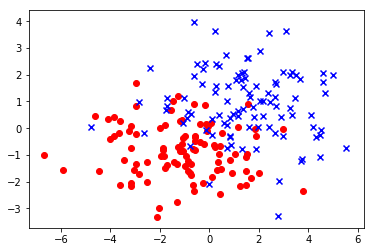

In [4]:
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = LinearDiscriminantAnalysis(n_components = 1)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_
w, b

(array([0.78128854, 1.44511796]), array([-0.19717582]))

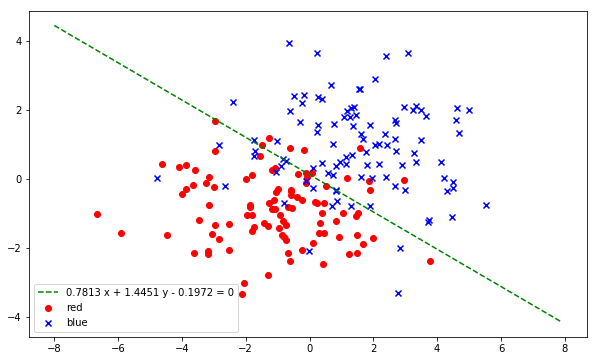

In [6]:
plt.figure(figsize = (10, 6))

plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

X_range = np.arange(-8, 8, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score
clf = LinearDiscriminantAnalysis(n_components = 1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.775, 0.875, 0.875, 0.875, 0.85 ])

# 4. Perceptron

## 4.1 The optimization problem

Suppose that $\mathbf x$ contains a dummy column 1 and $\mathcal Y = \{\pm 1\}$.

The method in this section aims to find a function of the following form
$$
h(x) = f(\mathbf w \cdot \mathbf x)
$$

where $f(a) = 1$ if $a \geq 0$ and $-1$ if $a < 0$ such that it minimizes
$$
E(\mathbf w) = -\sum_{n \in \mathcal M} (\mathbf w \cdot \mathbf x_n)y_n
$$

subject to $|w| = C$ (some positive constant), where $\mathcal M = \mathcal M(\mathbf w)$ is the set of indices $n$ where $\mathbf x_n$ is mis-classified.

Here, $\mathbf w \cdot \mathbf x = 0$ separates the space into 2 half-spaces of class 1 and -1; $E(\mathbf w)$ is the sum of projected distance of mis-classified data. 

## 4.2 The Perceptron Algorithm

The negative gradient of $E(\mathbf w)$ is
$$
-\nabla E(\mathbf w) = \sum_{n \in \mathcal M} y_n \mathbf x_n
$$

This leads to a gradient descend algorithm with the following update step:

$$
\mathbf w^{(r+1)} = \mathbf w^{(r)} + \alpha \sum_{n \in \mathcal M(\mathbf w^{(r)} ) } y_n \mathbf x_n
$$
($r$ is the iteration step)

A stochastic version of this step (known as stochastic gradient descence) is not considering all  $\sum_{n \in \mathcal M(\mathbf w^{(r)})} y_n \mathbf x_n$, but choose randomly an $n \in \mathcal M(\mathbf w^{(r)})$ and do the following update

$$
\mathbf w^{(r+1)} = \mathbf w^{(r+1)} + \eta y_n \mathbf x_n
$$

As we can choose $C$ arbitrarily, we can choose $\beta$ instead, for example $\eta = 1$, we have the following algorithm.

**Perceptron**

1. Initial $\mathbf w$ randomly
2. Repeat:
	- Choose $n$ randomly in $\mathcal M(\mathbf w)$
        - If $y_n (\mathbf w \cdot \mathbf x) \leq 0$: $\mathbf w = \mathbf w + \eta y_n \mathbf x_n$
3. Until convergence ($E(\mathbf w)$ unchanged or changed very little)

**Illustration** (from [2])
<img src="F2.png" width=600 >

## 4.3 Perceptron and Linear Separability

- If the data set is linearly separable, the algorithm is guaranteed to find out a line separating the two classes.  there may be many solutions, depending on the order of data points and initialization. 

- If the data set is not linearly separable, no guarantee that the algorithm will converge.

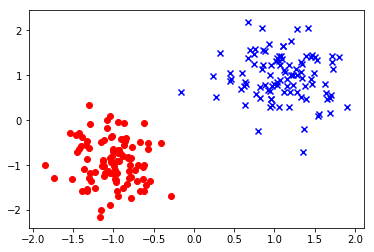

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Example2.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

**Using LDA**

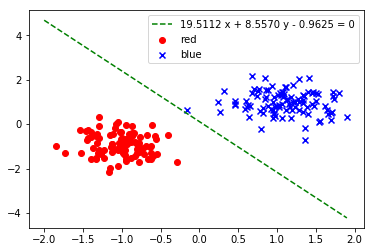

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = LinearDiscriminantAnalysis(n_components = 1)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

X_range = np.arange(-2, 2, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()

**Using Perceptron**

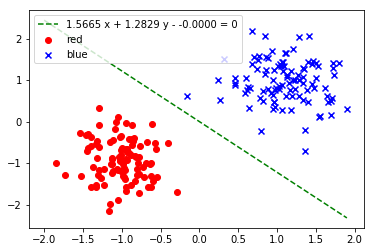

In [24]:
from sklearn.linear_model import Perceptron
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = Perceptron(eta0 = 1, random_state = 1)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

X_range = np.arange(-2, 2, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()

**For Non-linear-separability Case**

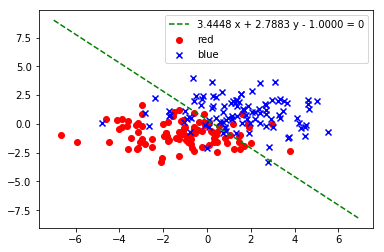

In [11]:
data = pd.read_csv("Example1.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = Perceptron(eta0 = 1, random_state = 0)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

X_range = np.arange(-7, 7, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score
clf = Perceptron(eta0 = 1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.8  , 0.85 , 0.775, 0.95 , 0.825])

# 5. Probabilistic Model for Linear Discriminant Analysis (LDA)

## 5.1 The Optimization Problem

This method modelize the joint distribution $p(\mathbf x, y)$ via $p(y)$ and $p(\mathbf x|y)$

We suppose
$$
\mathbf P(\mathcal C_1) = \mathbf P(y = 1) = \pi
$$
or
$$
\mathbf P(\mathcal C_0) = \mathbf P(y = 0) = 1-\pi
$$
(equivalently, $y$ follows a Bernoulli distribution of parameter $\pi$).

and
$$
p(\mathbf x | y) = \mathcal N(\mathbf x | \mu_y, \Sigma) = (2\pi |\Sigma|)^{-D/2}\exp \left( -\frac{(\mathbf x - \mathbf \mu_y)^t \Sigma^{-1} (\mathbf x - \mathbf \mu_y)}{2}\right)
$$

The distribution of the 2 classes have the same variance.

Suppose $(\mathbf x_1, y_1), \ldots, (\mathbf x_N, y_N)$ are iid samples; we have
$$
p(\mathbf x_1, \ldots, \mathbf x_N, y_1, \ldots, y_N) = \prod_{i=1}^{N} \left[ \pi \delta_1 \mathcal N (\mathbf x_i | \mu_1, \Sigma)\right]^{y_i} \left[ (1-\pi) \delta_0 \mathcal N (\mathbf x_i | \mu_0, \Sigma)\right]^{1-y_i} 
$$

Ignoring the Dirac distribution, we want to maximize the joint distribution:

$$
\prod_{i=1}^{N} \left[ \pi \mathcal N (\mathbf x_i | \mu_1, \Sigma)\right]^{y_i} \left[ (1-\pi) \mathcal N (\mathbf x_i | \mu_0, \Sigma)\right]^{1-y_i} 
$$

or minimize its negative log likelihood
$$
L(\pi, \mu_0, \mu_1, \Sigma) = -\sum_{i=1}^N \left( y_i \log \pi + y_i \log \mathcal N(\mathbf x_i | \mu_1, \Sigma) + (1 - y_i)\log(1-\pi) + (1-y_i) \log \mathcal N(\mathbf x_i | \mu_0, \Sigma) \right)
$$

## 5.2 Solution

### 5.2.1 $\pi$

Consider the parts containing $\pi$, we have
$$
-\sum_{i=1}^N \left( y_i \log \pi + (1 - y_i)\log(1-\pi) \right)
$$

Take derivative over $\pi$, we have:
$$
\frac1\pi \sum_{i=1}^N y_i - \frac1{1-\pi} \sum_{i=1}^N (1-y_i)
$$

Let this quantity be 0, then the estimator $\hat \pi$ of $\pi$ is
$$
\hat \pi = \frac{\sum_{i=1}^N y_i}N
$$

Donc
$$
\hat \pi = \frac{N_1}N
$$

where $N_1 = \sum_{i=1}^N y_i$ is the number of points in class $\mathcal C_1$;  $N_0 = \sum_{i=1}^N (1 - y_i)$ is the number of points in class $\mathcal C_0$.

### 5.2.2 $\mu_1, \mu_0$

The only part of $L$ containing $\mu_1$ is
$$
\sum_{i=1}^N \log \mathcal N (\mathbf x_i | \mu_1, \Sigma) = \sum_{y_i = 1} \frac{-(\mathbf x_i - \mu_1)^t \Sigma^{-1}(\mathbf x_i - \mu_1)}{2} + const
$$

Taking derivative ovef $\mu_1$ and let it be zero:
$$
\sum_{y_i = 1} \Sigma^{-1}(\mathbf x_i - \mu_1) = 0
$$

we have
$$
\hat \mu_1 = \frac1{N_1} \sum_{y_i =1} \mathbf x_i
$$

$$
\hat \mu_0 = \frac1{N_2} \sum_{y_i=0} \mathbf x_i
$$

### 5.2.3 $\Sigma$

The part containing $\Sigma$.

$$
-\frac{N_1}2 \log |\Sigma| - \frac12 \sum_{i=1}^N y_i (\mathbf x_i -\mu_1)^t \Sigma^{-1} (\mathbf x_i - \mu_1) - \frac{N_0}2 
\log |\Sigma| - \frac12 \sum_{i=1}^N (1-y_i) (\mathbf x_i -\mu_0)^t \Sigma^{-1} (\mathbf x_i - \mu_0)
$$

$$
=: -\frac{N}2 \log |\Sigma| - \frac{N_1}2 Tr(\Sigma^{-1}S_1) - \frac{N_0}2 Tr(\Sigma^{-1}S_0)
$$

$$
=: -\frac{N}2 \log |\Sigma| - \frac{N}{2} Tr |\Sigma^{-1}S|
$$

where 
$$
S = \frac{N_1}N S_1 + \frac{N_0}N S_0
$$

$$
S_1 = \frac1{N_1}\sum_{y_i = 1}(\mathbf x_i - \mu_1)(\mathbf x_i - \mu_1)^t
$$
$$
S_0 = \frac1{N_0} \sum_{y_i = 1}(\mathbf x_i - \mu_0)(\mathbf x_i - \mu_0)^t
$$

Let the above part be zero and solve it:
$$
\hat \Sigma = S
$$

## 5.3 Decision Boundary

The rule is to predict $y$ under probability form, as $\mathbf P(y=1|\mathbf x) = \frac{p(y=1, \mathbf x)}{p(\mathbf x)} $.

We decide a data point belongs to class 0 or 1 if the ratio
$$
\frac {p( y=1|\mathbf x)}{p(y = 0|\mathbf x)} = \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)}
$$
less or greater than 1, or
$$
\log \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)}
$$
less or greater than 0.

We have
$$
\log \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)} = \log \frac{\hat \pi}{1 - \hat \pi} - \frac12 (\mathbf x - \hat \mu_1)^t \hat \Sigma^{-1} (\mathbf x - \hat \mu_1) + \frac12 (\mathbf x - \hat \mu_0)^t \hat \Sigma^{-1} (\mathbf x -\hat \mu_0)
$$

$$
= (\hat \mu_1 - \hat \mu_0)^t \Sigma^{-1} \mathbf x - \frac12 \hat \mu_1^t \Sigma^{-1} \hat \mu_1 + \frac12 \hat \mu_0^t \Sigma^{-1} \hat \mu_0 + \log\frac{\hat \pi}{1-\hat \pi}
$$

$$
= \mathbf w^t \mathbf x + w_0
$$

where
$$
\mathbf w = \hat \Sigma^{-1}(\hat \mu_1 - \hat \mu_0) = S^{-1} (\hat \mu_1 - \hat \mu_0)
$$
$$
w_0 = -\frac12 \hat\mu_1^t \hat\Sigma^{-1} \hat\mu_1 + \frac12 \hat\mu_0^t\Sigma^{-1}\hat\mu_0 + \log\frac{\hat \pi}{1-\hat \pi}
$$

We find the same direction of $\mathbf w$ as in Fisher's linear discriminant approach.

## 5.4 Implementation (with Gaussian Distribution Plotting)

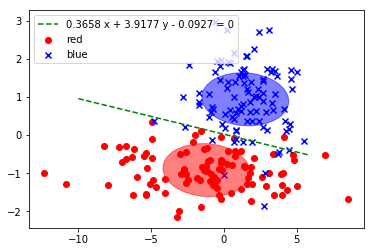

In [13]:
#From http://scikit-learn.org/0.16/auto_examples/classification/plot_lda_qda.html
import matplotlib as mpl
from numpy import linalg

def plot_ellipse(ax, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
def plot_lda_cov(ax, lda):
    plot_ellipse(ax, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(ax, lda.means_[1], lda.covariance_, 'blue')
    
data = pd.read_csv("Example4.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = LinearDiscriminantAnalysis(n_components = 1, store_covariance=True)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')
plot_lda_cov(ax, clf)

X_range = np.arange(-10, 6, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()

# 6. Quadratic Discriminant Analysis (QDA)

## 6.1 The Optimization Problem

We modelize the same way as LDA, but the two classes have different variance:

We suppose
$$
\mathbf P(\mathcal C_1) = \mathbf P(y = 1) = 1 - \pi
$$
or
$$
\mathbf P(\mathcal C_0) = \mathbf P(y = 0) = \pi
$$
(equivalently, $y$ follows a Bernoulli distribution of parameter $\pi$).

and
$$
p(\mathbf x | y) = \mathcal N(\mathbf \mu_y | \sigma_y, \Sigma_y) = (2\pi |\Sigma_y|)^{-D/2}\exp \left( -\frac{(\mathbf x - \mathbf \mu_y)^t \Sigma_y^{-1} (\mathbf x - \mathbf \mu_y)}{2}\right)
$$

Hence, we minimize its negative log likelihood
$$
L(\pi, \mu_0, \mu_1, \Sigma) = -\sum_{i=1}^N \left( y_i \log \pi + y_i \log \mathcal N(\mathbf x_i | \mu_1, \Sigma_1) + (1 - y_i)\log(1-\pi) + (1-y_i) \log \mathcal N(\mathbf x_i | \mu_0, \Sigma_0) \right)
$$

## 6.2 Solution

$$
\hat \pi = \frac{N_1}N
$$

$$
\hat \mu_1 = \frac1{N_1} \sum_{y_i =1} \mathbf x_i
$$

$$
\hat \mu_0 = \frac1{N_2} \sum_{y_i=0} \mathbf x_i
$$

$$
\hat \Sigma_1 =  \frac1{N_1} \sum_{y_i = 1}(\mathbf x_i - \mu_1)(\mathbf x_i - \mu_1)^t
$$

$$
\hat \Sigma_0 =  \frac1{N_0} \sum_{y_i = 1}(\mathbf x_i - \mu_0)(\mathbf x_i - \mu_0)^t
$$

## 6.3 Decision Boundary

We decide a data point belongs to class 0 or 1 if the ratio
$$
\frac {p( y=1|\mathbf x)}{p(y = 0|\mathbf x)} = \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)}
$$
less or greater than 1, or
$$
\log \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)}
$$
less or greater than 0.

We have
$$
\log \frac {p( \mathbf x, y=1)}{p(\mathbf x, y = 0)} = \log \frac{\hat \pi}{1 - \hat \pi} - \frac12 (\mathbf x - \hat \mu_1)^t \hat \Sigma^{-1} (\mathbf x - \hat \mu_1) + \frac12 (\mathbf x - \hat \mu_0)^t \hat \Sigma^{-1} (\mathbf x -\hat \mu_0)
$$

It has quadratic form (hyperbol, or product of 2 lines, ...).

## 6.4 Implementation

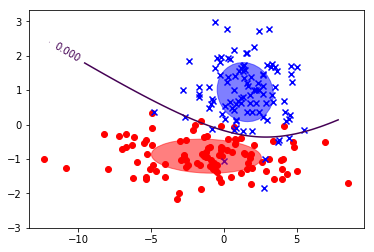

[array([[14.2585626 , -0.17451731],
       [-0.17451731,  0.24430579]]), array([[ 3.72895279, -0.14161675],
       [-0.14161675,  0.73483217]])]


In [14]:
#From http://scikit-learn.org/0.16/auto_examples/classification/plot_lda_qda.html
import matplotlib as mpl
from numpy import linalg
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def plot_ellipse(ax, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
def plot_qda_cov(ax, qda):
    plot_ellipse(ax, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(ax, qda.means_[1], qda.covariance_[1], 'blue')
    
data = pd.read_csv("Example4.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(X, y)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')
plot_qda_cov(ax, clf)

X = np.arange(-12, 8, 0.1)
Y = np.arange(-3,  3, 0.1)
X, Y = np.meshgrid(X, Y)

def boundary(qda, X, Y):
    res = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z = np.array([X[i,j], Y[i,j]])
            res[i, j] = np.log(qda.priors_[1]/qda.priors_[0]) - 0.5 * np.dot(np.dot(np.linalg.inv(qda.covariance_[1]) , z - qda.means_[1]), z - qda.means_[1]) + 0.5 * np.dot(np.dot(np.linalg.inv(qda.covariance_[0]) , z-qda.means_[0]), z - qda.means_[0])
    return res

boundary(clf, X, Y)
CS = plt.contour(X, Y, boundary(clf, X, Y), levels=[0])
plt.clabel(CS, fontsize=10)
plt.show()

print clf.covariance_

# 7. Logistic Regression

## 7.1 The Optimization Problem

This time we find another metric distance between the true $y$ and the predicted $y'$. We want to predict $y'$ in term of a value of $(0, 1)$ instead of \{0, 1\}.

Suppose that we have found a good separating line. For a prediction $y$ by $f(\mathbf x) = \mathbf w\cdot \mathbf x + b$. Suppose $\mathbf x$ contains a dummy coordinate 1, we can use $f(\mathbf x) = \mathbf w\cdot \mathbf x$ instead, we want to find a function $L\geq 0$ such that:

- $L$ is 0 or small if $\mathbf w \cdot \mathbf x \geq 0$ and $y = 1$, or if $\mathbf w \cdot \mathbf x \leq 0$ and $y = 0$
- $L$ is large if $\mathbf w \cdot \mathbf x \geq 0$ and $y = 0$, or if $\mathbf w \cdot \mathbf x \leq 0$ and $y = 1$

Let
$$
\sigma(z) = logit(z) = \frac{1}{1 + \exp(-z)}
$$

Then, 
$$
L(\mathbf x, y; \mathbf w) =- y \cdot \log(\sigma(\mathbf w \cdot \mathbf x) - (1 - y) \cdot \log(\sigma(-\mathbf w \cdot \mathbf x))
$$
$$
=- y \cdot \log\left(\frac1{1 + \exp(-\mathbf w \cdot \mathbf x)}\right) - (1 - y) \cdot \log\left(\frac1{1 + \exp(\mathbf w \cdot \mathbf x)}\right)
$$

is a function corresponding to our expectation.

This function is called the logit function.

We will predict $y$ as $\frac{1}{1 + exp(-\mathbf w \cdot \mathbf x)}$. Its value is always in (0, 1). Furthermore it is near 1 if $\mathbf w \cdot \mathbf x)$ is large positive, i.e the data point is clearly on the first class (far from the boundary) and near 0 if $\mathbf w \cdot \mathbf x)$ is large negative. It is 1/2 if $\mathbf x$ is on the boundary ($\mathbf w\cdot \mathbf x = 0$).



### The logit function

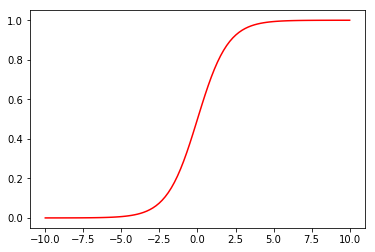

In [15]:
def logit(z):
    return 1./(1 + np.exp(-z))

X = np.linspace(-10, 10, 100)
plt.plot(X, logit(X), 'r')

### The negative log of logit function

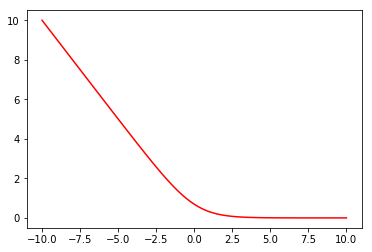

In [16]:
def minusloglogit(z):
    return -np.log(1./(1 + np.exp(-z)))

X = np.linspace(-10, 10, 100)
plt.plot(X, minusloglogit(X), 'r')

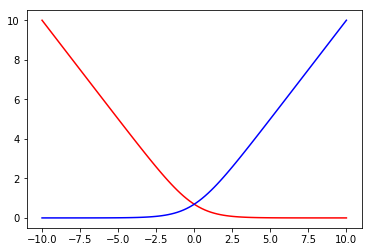

In [17]:
def loss(y, predicted_y):
    return - y * np.log(1./(1 + np.exp(-predicted_y))) - (1 - y) * np.log(1 - 1./(1 + np.exp(-predicted_y)))

X = np.linspace(-10, 10, 100)
plt.plot(X, loss(1, X), 'r', label="Loss for class 1")
plt.plot(X, loss(0, X), 'b', label="Loss for class 0")

The logistic regression algorithm finds $\mathbf w$  that maximizes
$$
\sum_{i=1}^N L(\mathbf x_i, y_i)
$$
where $\mathbf x_i, y_i$ are observed data in the training set.

## 7.2 An Iterative Algorithm: Iterative Reweighted Least Square (IRLS)

An iterative algorithm works like this:

- Initialize **w** arbitrarily
- Then repeat
    - Update **w**
- Until a convergence criterion is met.

For IRLS, the repetition is described as:
$$
\mathbf w_{new} = \mathbf w - \mathbf H^{-1} \nabla L(\mathbf w)
$$

Let $\Phi$ be the matrix $N \times D$ representing data points $\mathbf x_1, \ldots \mathbf x_N$, $\mathbf y$ be the vector $(y_1, \ldots, y_N)^t$

Then
$$
\nabla L(\mathbf w) = \Phi^t (\sigma(\Phi \mathbf w))  - \Phi^t \mathbf y
$$

($\sigma$ on a vector is a vector of $\sigma$ on features.)

$$
H = \sum_{i=1}^N \sigma(\mathbf x_i \cdot \mathbf w)(1-\sigma(\mathbf x_i \cdot \mathbf w))\Phi \Phi^t = \Phi^t R \Phi
$$
where $R$ is the diagonal matrix $diag(\sigma(\mathbf x_i \cdot \mathbf w)(1-\sigma(\mathbf x_i \cdot \mathbf w)))$


In practice,
$$
\mathbf w_{new} = \mathbf w - (\mathbf \Phi^t R \mathbf \Phi)^{-1} \Phi^t (\sigma(\mathbf w \cdot \mathbf x)-\mathbf y)
$$
$$
 =  (\mathbf \Phi^t R \mathbf \Phi)^{-1} \mathbf \Phi^t R \mathbf z
$$

where $\mathbf z$ is a N-dimensional vector: 
$$
\mathbf z = \mathbf \Phi \mathbf w - R^{-1}(\sigma(\mathbf w \cdot \mathbf x)- \mathbf y)
$$


## 7.3 Implementation

[0.79091164 1.47098009]


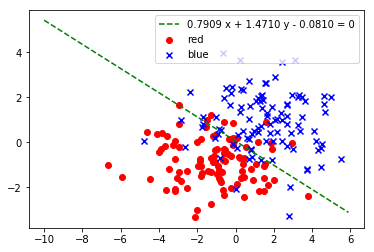

In [38]:
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("Example1.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = LogisticRegression(C = 10, solver='lbfgs')
clf.fit(X, y)
w = clf.coef_[0]
print w
b = clf.intercept_
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

X_range = np.arange(-10, 6, 0.1)
plt.plot(X_range, -X_range*w[0]/w[1] - b/w[1], 'g--', label = "%.4f x + %.4f y - %.4f = 0" % (w[0], w[1], -b))

plt.legend(loc="best")
plt.show()


# 8. K Nearest Neighbors

## 8.1 A Simple Density Estimator

(This section uses the explanation in [2])

Suppose we want to re-establish some unknown estimation of the density $p(\mathbf x)$ of $\mathbf x$ (we also use $\mathbf x$ to denote the random variable) in $\mathbf R^D$. Consider a small zone $\mathcal R$ containing $\mathbf x$, then probability of this zone is:

$$
P = \int_{\mathcal R} p(\mathbf x) d\mathbf x
$$

Suppose we have a data set of $N$ observations drawn from $p(\mathbf x)$. Each data point has a probability of falling in $\mathbf R$, the probability that there are $K$ points lying inside $\mathcal R$ is $\textrm{Bin}(K|N, P) = \frac{N !}{K!(N-K)!} P^K (1-P)^{(N-K)}$ . The mean fraction of points falling inside the region is $\mathbf E[K/N] = P$, and $\mathbf {Var} [K/N] = P(1-P)/N$. For large $N$, the distribution will be sharply peaked around the mean, so
$$
K \approx NP
$$
If $\mathcal R$ is small enough so that $p(\mathbf x)$ is quite the same in this region, we have
$$
P \approx p(\mathbf x) |\mathcal R|
$$

where $|\mathcal R|$ denotes the volume of $\mathbf R$.

Therefore, we have the following density estimator for $p(\mathbf x)$:
$$
p(\mathbf x) = \frac K{N|\mathcal R|}
$$

This is just a density estimator and depends on 2 contradictory assumptions: $\mathcal R$ is sufficiently small and the number $K$ of points falling inside the region is sufficient for the binomial distribution to be sharply peaked. In fact if one of the two assumptions does not hold, improvement on one assumption will make the other to be worse:

- If we keep $K$ large, then $|\mathcal R|$ must be large such that the region contains $K$ points.
- If we keep $|\mathcal R|$ small, then the number $K$ of points in the region may be small. 

## 8.2 The Algorithm

Return to the classification problem with 2 classes $\mathcal C_1, \mathcal C_0$. Using the above density estimation, one method is to keep $K$ and variate $\mathcal R$. For a set of data point $S =\{\mathbf x_1, \ldots \mathbf x_N\}$, and for let $\mathcal R(\mathbf x)$ denote the smallest sphere centered at $\mathbf x$ containing exactly $K$ points. Let $V$ denote $|\mathcal R(\mathbf x)|$. Let $N_0, N_1$ be the total number of points in classes $\mathcal C_0, \mathcal C_1$, and $K_0(\mathbf x), K_1(\mathbf x)$ denote the number of points in the sphere $\mathcal R(\mathbf x)$.

We want to predict which class $\mathbf x$ belongs to. The problem becomes modelizing $P(\mathbf C_k|\mathbf x)$ ($k = 0, 1$). We have the estimators

$$
p(\mathbf x|\mathbf C_k) = \frac{K_k}{N_k V}
$$

$$
p(\mathbf x) = \frac K {NV}
$$

and 
$$
P(\mathbf C_k) = N_k/N 
$$

Hence
$$
P(\mathbf C_k|\mathbf x) = \frac{K_k}{K}
$$

We choose $k$ that maximizes $P(\mathbf C_k|\mathbf x)$, so $k$ with maximum $K_k$ is chosen.

The algorithm suggests the class where the majority of the nearest k neighbors belong to. 

## 8.3 Implementation

In [20]:
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("Example1.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

K = 5

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = KNeighborsClassifier(n_neighbors=K, weights ='uniform')
clf.fit(X, y)
print clf.predict([[0,1], [2, 3]])
print clf.predict_proba([[0,1], [2, 3]])


[1 1]
[[0.4 0.6]
 [0.  1. ]]


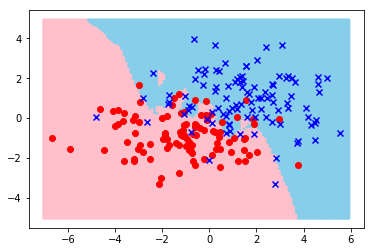

In [21]:
X_range = np.arange(-7, 6, 0.1)
Y_range = np.arange(-5, 5, 0.1)
X_range, Y_range = np.meshgrid(X_range, Y_range)

def classify(clf, X, Y):
    res = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z = np.array([[X[i,j], Y[i,j]]])
            res[i, j] = clf.predict(z)[0]
    return res

Z = classify(clf, X_range, Y_range).flatten()
COLOR = ['pink', 'skyblue']
plt.scatter(X_range, Y_range, color=[COLOR[int(Z[i])] for i in range(len(Z))], marker='.')
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')

# 9. Naive Bayes

## 9.1 Naive Bayes. The Optimization Problem
Suppose $\mathbf x = (x^{(1)}, \ldots, x^{(D)})$ (contains $D$ features). We would like to modelize:

$$
p(y \mid x^{(1)}, \dots, x^{(D)}) = \frac{p(y) p(x^{(1)}, \dots, x^{(D)} \mid y)}{p(x^{(1)}, \dots, x^{(D)})}
$$

Suppose for each $i$
$$
P(x^{(i)} | y, x^{(1)}, \dots, x^{({i-1})}, x^{({i+1})}, \dots, x^{(D)}) = P(x^{(i)} | y),
$$

This means the features are mutually independent.

Then
$$
p(y \mid x^{(1)}, \dots, x^{(D)} ) = \frac{p(y) \prod_{i=1}^{D} p(x^{(i)} \mid y)}
                                 {p(x^{(1)}, \dots, x^{(D)}) }
$$

Since $p(x^{(1)}, \dots, x^{(D)})$ is constant given the input:

$$
P(y \mid x^{(1)}, \dots, x^{(D)}) \propto p(y) \prod_{i=1}^{D} p(x^{(i)} \mid y)
$$

We can then assume some probability distributions on $p(y)$ and $p(x^{(i)} \mid y)$ depending on some unknown parameters $W$ and solve the maximization problem:

$$
\arg\max_{W} \prod_{n=1}^N p(y_n) \prod_{i=1}^{D} p(x_n^{(i)} \mid y_n),
$$ 

## 9.2 Gaussian Naive Bayes

If $y$ follows Bernoulli law, $p(x_i \mid y)$ follows normal distribution, we have QDA model but with a diagonal covariance matrix. This model is called Gaussian Naive Bayes.

$$
p(x^{(i)} \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x^{(i)} - \mu_y)^2}{2\sigma^2_y}\right)
$$

Using maximum likelihood, we retrieve the same solution as for QDA case:

$$ 
\mu_k ={\frac {1}{|\mathcal C_k|}}\sum _{y_n = k} x_n
$$
($k=0,1$)

The variance of feature $x_i$:

$$
(\sigma_k^{(i)}) ^{2}= \frac {1}{|\mathcal C_k|} \sum _{y_n = k}\left( x_n^{(i)} -\mu_k^{(i)} \right)^2 
$$

### Implementation

D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


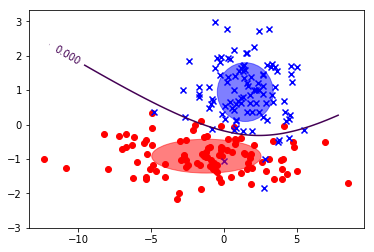

[[14.11597698  0.24186274]
 [ 3.69166327  0.72748386]]


In [56]:
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv("Example4.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

def plot_gnb_cov(ax, gnb):
    plot_ellipse(ax, gnb.theta_[0], np.diag(gnb.sigma_[0]), 'red')
    plot_ellipse(ax, gnb.theta_[1], np.diag(gnb.sigma_[1]), 'blue')

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
clf = GaussianNB()
clf.fit(X, y)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(red_data[0], red_data[1], color='red', marker='o', label = 'red')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x', label = 'blue')
plot_gnb_cov(ax, clf)

X = np.arange(-12, 8, 0.1)
Y = np.arange(-3,  3, 0.1)
X, Y = np.meshgrid(X, Y)

def boundary(gnb, X, Y):
    res = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z = np.array([X[i,j], Y[i,j]])
            res[i, j] = np.log(gnb.class_prior_[1]/gnb.class_prior_[0]) - 0.5 * np.dot(np.dot(np.linalg.inv(np.diag(gnb.sigma_[1])) , z - gnb.theta_[1]), z - gnb.theta_[1]) + 0.5 * np.dot(np.dot(np.linalg.inv(np.diag(gnb.sigma_[0])) , z-gnb.theta_[0]), z - gnb.theta_[0])
    return res

boundary(clf, X, Y)
CS = plt.contour(X, Y, boundary(clf, X, Y), levels=[0])
plt.clabel(CS, fontsize=10)
plt.show()

print clf.sigma_


# 10. A Short Recap

| Model                 | Probabilistic Model   Representation                                                                                                                                                         |                                 |                                                   | ERM Representation                    |                                                          |                                      | Solution                         |                                        | Other Representation                                               |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------|---------------------------------------------------|---------------------------------------|----------------------------------------------------------|--------------------------------------|----------------------------------|----------------------------------------|--------------------------------------------------------------------|
|                       | Probability Distribution                                                                                                                                                                     | Parameters                      | Optimization Problem                              | Loss function                         | Hypothesis class                                         | Regularization                       | Solution                         | Decision Rule                          | Other representation                                               |
| Linear Regression     | $p(y|x)$ follows Gaussian   distribution mean $w\cdot x + b$,      $y_i$ independent conditionned on $x_i$                                                                                   | $w, b$                          | ML     $p(x_1, \ldots, x_N| y_1, \ldots, y_N)$    | $l(y, y') = |y -y'|^2$                | $\{ x: x \mapsto w\cdot x + b ; w, b\}$                     |                                    | Closed form     (amphi 6)        | $w\cdot x + b$                                       |                                                                    |
| Polynomial Regression | $p(y|x)$ follows Gaussian   distribution mean $R(x)$, $R$ is a polynomial,      $y_i$ independent conditionned on $x_i$                                                                        | $R$                          | ML     $p(x_1, \ldots, x_N| y_1, \ldots, y_N)$    | $l(y, y') = |y -y'|^2$                | $\{ x: x \mapsto R(x) ; w\}$, $R$ is a polynomial          |                                 |Closed form (amphi 6)                                     |$R(x)$                                        |                                                                    |
| Ridge                 | $p(w)$ follows Gaussian mean 0,   variance $\alpha I_D$ ($\alpha$ known),      $p(y|x, w)$ follows Gaussian distribution mean $w\cdot x + b$,      $y_i$ independent conditionned on $w, x_i$  | $w, b$                             | MAP     $p(w|x_1, \ldots, x_N, y_1, \ldots, y_N)$ | $l(y, y') = |y -y'|^2$                | $\{ x: x \mapsto w\cdot x + b ; w, b\}$                     | $\Vert x\Vert_1$                     | Closed form     (amphi 6)        |$w\cdot x + b   $                                     |                                                                    |
| Lasso                 | $p(w)$ follows   $\left(\frac{\lambda}{2}\right)^D exp(-\lambda\Vert x\Vert_1)$ ($\lambda$ know),      $p(y|x, w)$ follows Gaussian distribution mean $w\cdot x + b$,      $y_i$ independent conditionned on $w, x_i$ | $w, b$                             | MAP     $p(w|x_1, \ldots, x_N, y_1, \ldots, y_N)$ | $l(y, y') = |y -y'|^2$                | $\{ x: x \mapsto w\cdot x + b ; w, b\}$                     | $\Vert x\Vert_1^2$                   | Iterative method     (amphi 6)   |$w\cdot x + b $                                         |                                                                    |
| Perceptron            | Not a probabilistic method                                                                                                                                                                   | Not a probabilistic method      | Not a probabilistic method                        | $l(y, y') = y'.1_{yy' < 0}$              | $\{ x: x \mapsto w\cdot x ; w\}$                         |                                    | Iterative method     (section 4) | $sign(w \cdot x)$                      | Maximize     $$     \frac{w^t S_B w}{w^t S_W w}     $$ (section 3) |
| LDA                   | $p(y)$ follow Bernoulli$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma)$,      $(x_i, y_i)$ independent                                                                              | $\pi, \mu_y, \Sigma$            | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |                                       |                                                          |                                      |      (section 5)                 | argmax_y $P(y|x)$                      |                                                                    |
| QDA                   | $p(y)$ follow Bernoulli$(\pi)$,        $p(x|y)$ follow Gaussian$(\mu_y, \Sigma_y)$,      $(x_i, y_i)$ independent                                                                            | $\pi, \mu_y, \Sigma_y$          | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |                                       |                                                          |                                      |      (section 6)                 | argmax_y $P(y|x)$                      |                                                                    |
| Logistic Regression   | $p(y|x) = exp(\frac1{1 +   \exp(-w\cdot x - b})$,      $y_i$ independent conditionned on $x_i$                                                                                               | $w, b$                          | ML     $p(y_1, \ldots, y_N| x_1, \ldots, x_N)$    | $l(y,y') = ylog y' + (1-y)log (1-y')$ | $\{ x: x \mapsto \frac{1}{1+\exp(-w\cdot x-b)} ; w, b\}$ | Possible to add $L_1$, $L_2$ penalty (in that case ML becomes MAP) | Iterative methods                | $1_{w \cdot x + b > 0}$, $P(y|x)$                      |                                                                    |
| Naïve Bayes (general) | $p(y)$ follows some   distribution,      The features $x^{(i)}$ of $x$ are independent,      $p(x^{(i)}|y) $ follows some distribution,     $(x_i, y_i)$ independent,                         | Parameters of the distributions | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |                                       |                                                          |                                      |      (section 9)                 | argmax_y $P(y|x)$                      |                                                                    |
| Gaussian Naïve Bayes  | $p(y)$ follows Bernoulli$(\pi)$,        The features $x^{(i)}$ of $x$ are independent,      $p(x^{(i)}|y) $ follows Gaussian$(\mu_y^{(i)}, \Sigma_y^{(i)})$                                  | $\pi, \mu_y^{i}, \sigma_y^{i}$  | ML     $p(x_1, \ldots, x_N, y_1, \ldots, y_N)$    |                                       |                                                          |                                      |      (section 9)                 | argmax_y $P(y|x)$                      |                                                                    |
| K Nearest Neighbors   | $P(y) = \frac{N_y}{N}$,      $P(x|y) = \frac{K_y}{N_y}|\mathcal R|$ where $\mathcal R$ a ball containing   $K$ points                                                                        | Not a parametric model.         |  No optimization problem                          |  No optimization problem              | Not a parametric model.                                  |                                      |  No optimization problem         | Majority vote     (as $P(y|x) = K_y/K$ |                                                                    |

## References

[1] Shai Shalev-Shwartz and Shai Ben-David, *Understanding Machine Learning, from Theory to Algorithms*

[2] C. M. Bishop, Pattern Recognition And Machine Learning, Springer 2006

[3] http://www-connex.lip6.fr/~denoyer/wordpress/wp-content/uploads/2016/01/coursml2.pdf

[4] Andrew Ng, Machine Learning, Course on coursera.org

[5] Kirill Eremenko, Machine Learning A-Z TMTM : Hands-On Python & R in Data Science, course on udemy.com

[6] http://web.engr.oregonstate.edu/~xfern/classes/cs534/notes/LDA.pdf

[7] http://www.cedar.buffalo.edu/~srihari/CSE574/Chap4/4.3.3-IRLS.pdf